In [1]:
from DataLoader import loadCsiData
from CSIFase import get_Phase, get_phase_diff
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from hampel import hampel

In [2]:
path = "../Data/Apneia5_1-Mariana-Intel 5300-Normal-Sentado_costas-FFZ-_1m-Intel 5300-26_09_2022-15_49-99_94Hz-25R-90bpm.txt"
phase_diff_unwraped = pd.DataFrame(get_phase_diff(path))

Quantidade de pacotes:  12000
Shape das fases: (12000, 171)


In [56]:
phase_diff_unwraped.T[52:]

,0,1,2,3,4,5,6,7,8,9,...,11990,11991,11992,11993,11994,11995,11996,11997,11998,11999
52,0.481777,0.512177,0.484922,0.475996,0.472831,0.475228,0.452033,0.439264,0.425452,0.441593,...,0.202518,0.159064,0.157908,0.179560,0.161293,0.187298,0.191358,0.176380,0.185234,0.189022
53,0.421220,0.457250,0.515886,0.453023,0.489989,0.456275,0.448265,0.410481,0.447891,0.430203,...,0.207927,0.177852,0.152034,0.184330,0.186951,0.182116,0.198278,0.183619,0.187866,0.208903
54,0.487822,0.480828,0.498132,0.467404,0.484283,0.456850,0.423761,0.398822,0.447366,0.437576,...,-6.069350,-6.072287,-6.097490,-6.061529,-6.107002,-6.069870,-6.087294,-6.080464,-6.084644,-6.059142
55,0.554424,0.504405,0.480378,0.481785,0.478577,0.457424,0.399257,0.387162,0.446840,0.444949,...,0.219744,0.243945,0.219357,0.258983,0.165416,0.244514,0.193505,0.221824,0.209218,0.239184
56,0.579101,0.547861,0.526587,0.487329,0.539458,0.478664,0.465853,0.468443,0.515086,0.468443,...,0.231098,0.199241,0.239966,0.244976,0.274379,0.251509,0.239966,0.246171,0.237283,0.214359


# E se normalizar os valores das subportadoras?

In [3]:
# vamos transformar para um dataframe sapoha
import pandas as pd

df = pd.DataFrame(phase_diff_unwraped)

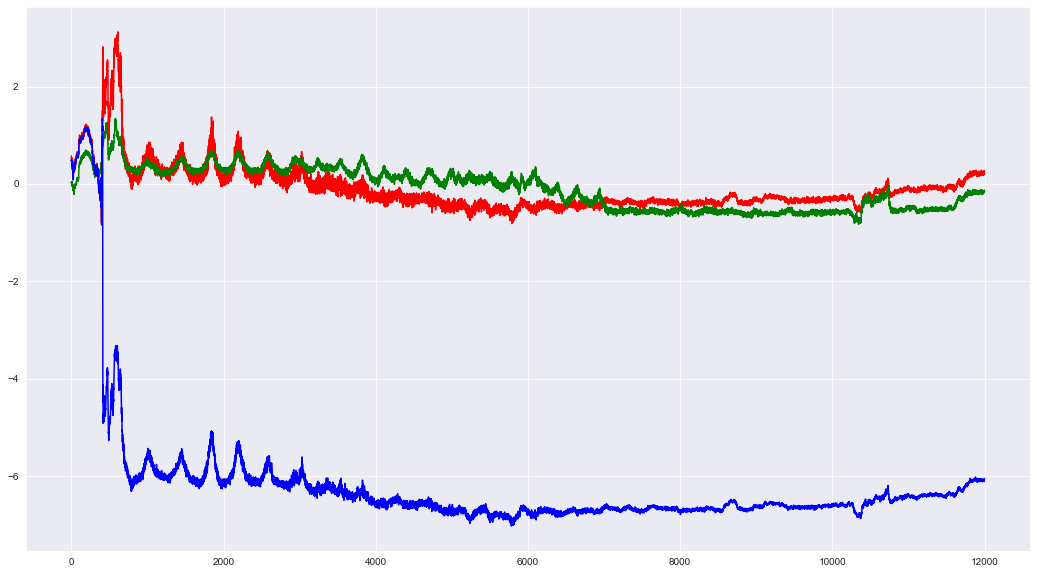

In [87]:
# original
plt.figure(figsize=(18,10))

plt.plot(df[56], color="r")
plt.plot(df[2], color="g")
plt.plot(df[54], color="b")

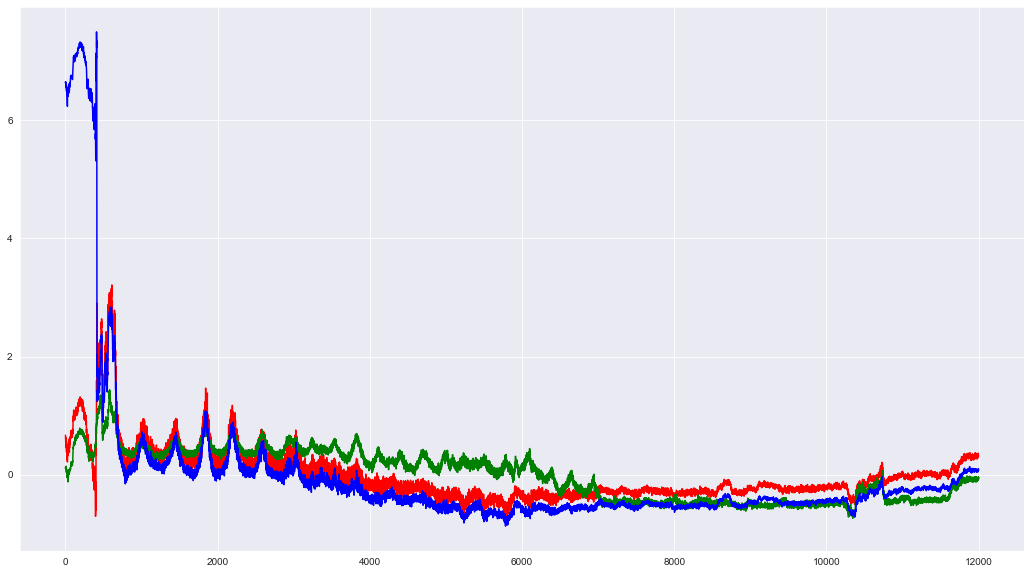

In [86]:
# subtraindo a média
plt.figure(figsize=(18,10))

plt.plot(df[56] - np.mean(df[56]), color="r")
plt.plot(df[2] - np.mean(df[2]), color="g")
plt.plot(df[54] - np.mean(df[54]), color="b")

> Ainda restam os outliers...

Então vamos subtrair a média em janelas:

Média das médias das janelas: -0.08848819307611512 
Desvio padrão das médias das janelas: 0.46314487050921554 
Mínimo das médias das janelas: -0.5895849789746122 
Máximo das médias das janelas: 2.228136357852085


Média das médias das janelas: -0.08901179185171447 
Desvio padrão das médias das janelas: 0.4233333716326233 
Mínimo das médias das janelas: -0.6815199066499271 
Máximo das médias das janelas: 0.9092093390806616


Média das médias das janelas: -6.155950804709203 
Desvio padrão das médias das janelas: 1.3404264816363731 
Mínimo das médias das janelas: -6.870056468423886 
Máximo das médias das janelas: 0.9904620361782678




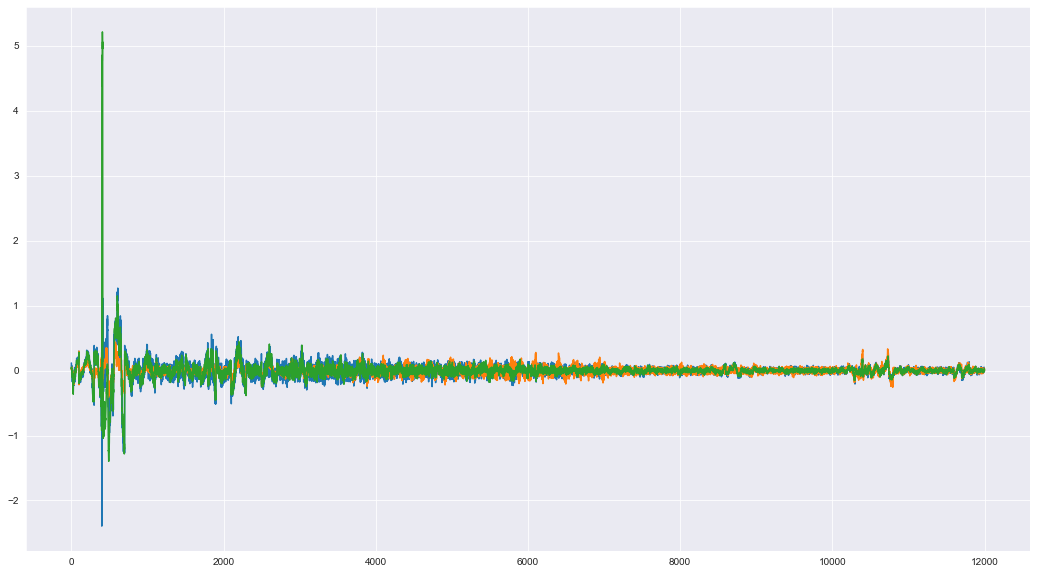

In [98]:
# subtraindo a média, 100 pacotes de janela
plt.figure(figsize=(18,10))
a = df[56].to_numpy()
b = df[2].to_numpy()
c = df[54].to_numpy()

for n in [a,b,c]:
    aux = np.array([])
    means = []
    for idx in range(0, len(n), 100):
        mean = np.mean(n[idx:idx+100])
        window_mean = n[idx:idx+100] - mean
        aux = np.concatenate([aux, window_mean])
        means.append(mean)
    plt.plot(aux)
    means = np.array(means)
    print("Média das médias das janelas:", np.mean(means), "\nDesvio padrão das médias das janelas:", means.std(), "\nMínimo das médias das janelas:", means.min(), "\nMáximo das médias das janelas:", means.max())
    print("\n")


> Parece que deformou o gráfico...

Média das médias das janelas: -0.08848819307611516 
Desvio padrão das médias das janelas: 0.40338433850994765 
Mínimo das médias das janelas: -0.5222121559703052 
Máximo das médias das janelas: 0.9883972694814215


Média das médias das janelas: -0.08901179185171444 
Desvio padrão das médias das janelas: 0.40888822607063946 
Mínimo das médias das janelas: -0.5951407943875769 
Máximo das médias das janelas: 0.5365419501275062


Média das médias das janelas: -6.155950804709203 
Desvio padrão das médias das janelas: 1.2738063251850311 
Mínimo das médias das janelas: -6.804428869641921 
Máximo das médias das janelas: -0.2992114021288662




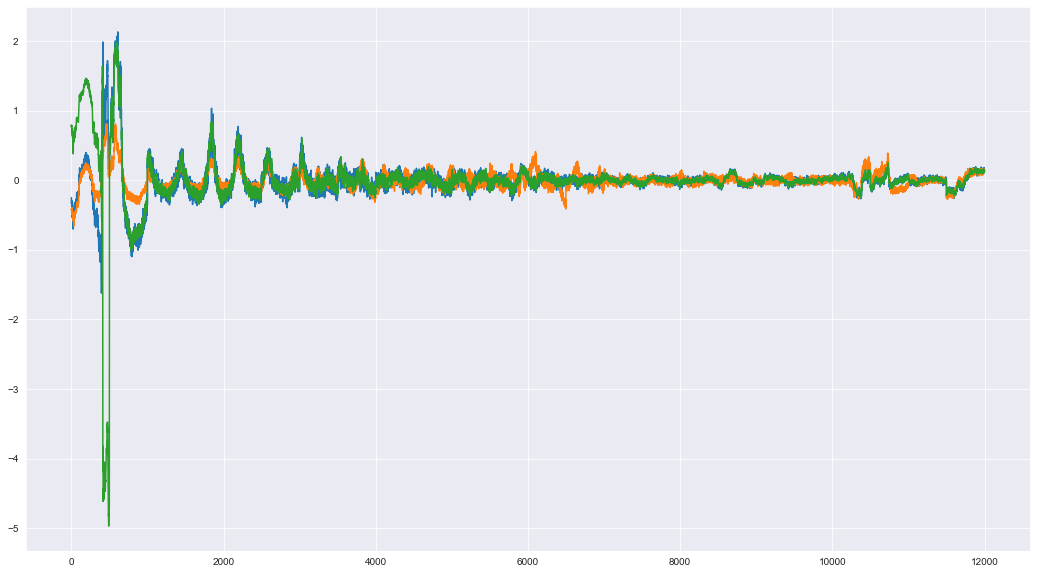

In [100]:
# subtraindo a média, 500 pacotes de janela
plt.figure(figsize=(18,10))
a = df[56].to_numpy()
b = df[2].to_numpy()
c = df[54].to_numpy()

for n in [a,b,c]:
    aux = np.array([])
    means = []
    for idx in range(0, len(n), 500):
        mean = np.mean(n[idx:idx+500])
        window_mean = n[idx:idx+500] - mean
        aux = np.concatenate([aux, window_mean])
        means.append(mean)
    plt.plot(aux)
    means = np.array(means)
    print("Média das médias das janelas:", np.mean(means), "\nDesvio padrão das médias das janelas:", means.std(), "\nMínimo das médias das janelas:", means.min(), "\nMáximo das médias das janelas:", means.max())
    print("\n")


> Ainda distorce bastante... Vamos ver o min max scaler em janelas:

In [83]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
a = scaler.fit_transform(df[56].to_numpy(dtype="float32").reshape(-1,1))
b = scaler.fit_transform(df[2].to_numpy(dtype="float32").reshape(-1,1))
c = scaler.fit_transform(df[54].to_numpy(dtype="float32").reshape(-1,1))

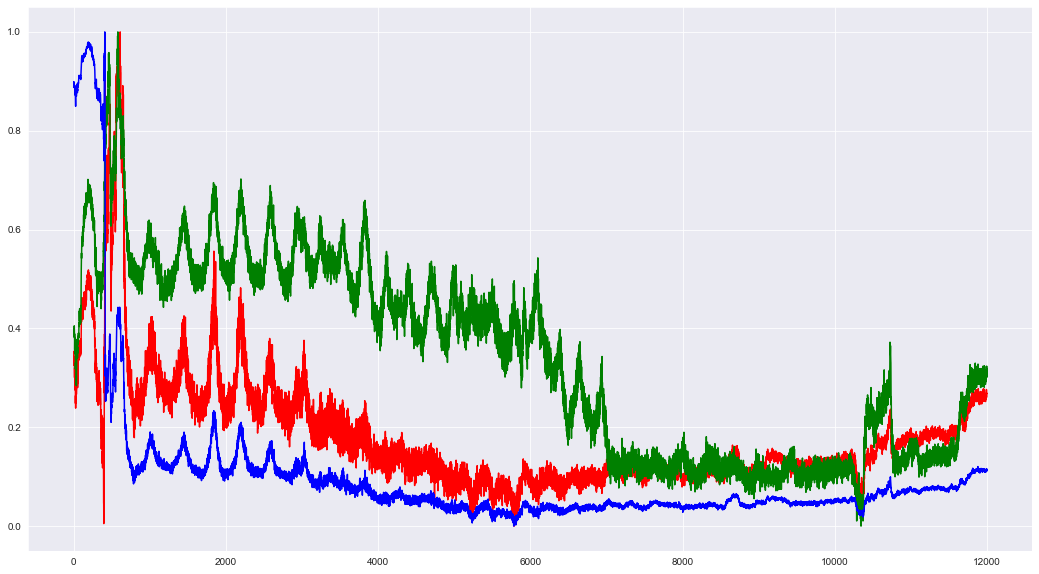

In [84]:
plt.figure(figsize=(18,10))
plt.plot(a, color="r")
plt.plot(b, color="g")
plt.plot(c, color="b")

plt.show()

## Min max em janelas

In [101]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

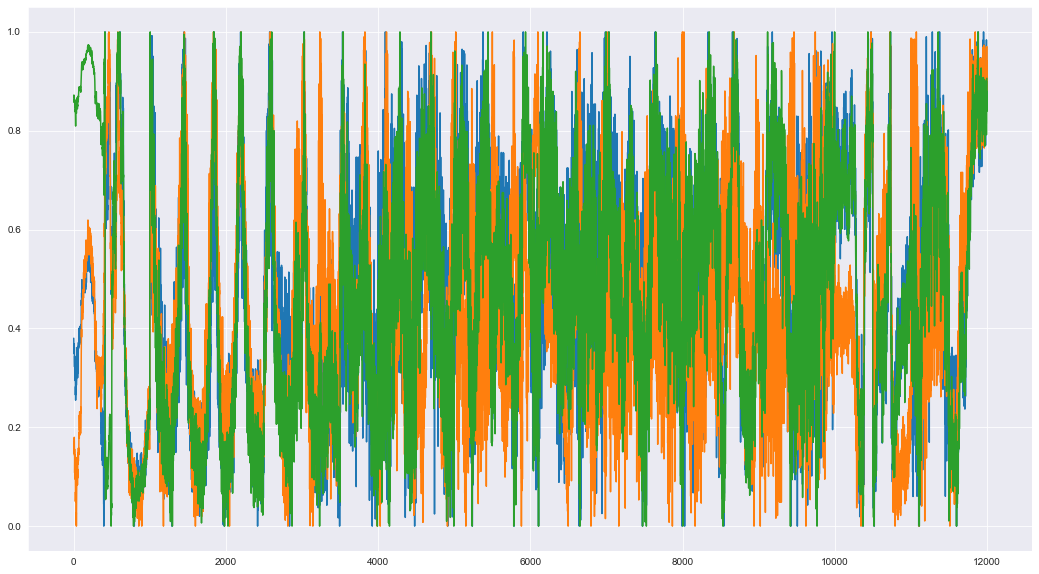

In [106]:
# subtraindo a média, 500 pacotes de janela
plt.figure(figsize=(18,10))
a = df[56].to_numpy()
b = df[2].to_numpy()
c = df[54].to_numpy()

for n in [a,b,c]:
    aux = np.array([])
    for idx in range(0, len(n), 500):
        window_mean = scaler.fit_transform(n[idx:idx+500].reshape(-1,1))
        aux = np.concatenate([aux, window_mean.reshape(-1)])
    plt.plot(aux)



> Claramente não prestou.

## Utilizando 30 segundo se calibracao e decaimento lá de redes da janela do Timeout

Média das médias das janelas: -0.23812079401827385 
Desvio padrão das médias das janelas: 0.23118340707078047 
Mínimo das médias das janelas: -0.44785702235567354 
Máximo das médias das janelas: 0.5125506614539029


Média das médias das janelas: -0.18578802797882352 
Desvio padrão das médias das janelas: 0.358103855004171 
Mínimo das médias das janelas: -0.5970201006445437 
Máximo das médias das janelas: 0.40823799272251016


Média das médias das janelas: -6.447241576655379 
Desvio padrão das médias das janelas: 0.40028091159055407 
Mínimo das médias das janelas: -6.7192398393009025 
Máximo das médias das janelas: -4.8933868556314275




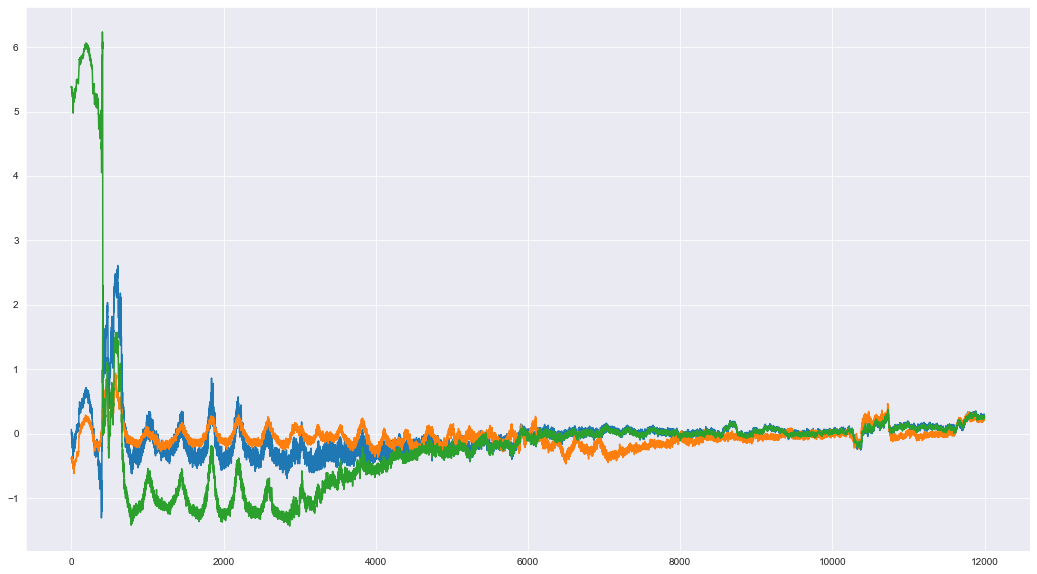

In [113]:
# subtraindo a média, 500 pacotes de janela
plt.figure(figsize=(18,10))
a = df[56].to_numpy()
b = df[2].to_numpy()
c = df[54].to_numpy()

for n in [a,b,c]:
    aux = n[:3000] - n[:3000].mean()
    means = [n[:3000].mean()]
    for idx in range(3000, len(n), 100):
        mean = (1 - 0.125) * means[-1] + 0.125 * np.mean(n[idx:idx+100])  # rtt estimation from TCP protocol
        window_mean = n[idx:idx+100] - mean
        aux = np.concatenate([aux, window_mean])
        means.append(mean)
    plt.plot(aux)
    means = np.array(means)
    print("Média das médias das janelas:", np.mean(means), "\nDesvio padrão das médias das janelas:", means.std(), "\nMínimo das médias das janelas:", means.min(), "\nMáximo das médias das janelas:", means.max())
    print("\n")


> Ainda não está bom.

Creio que agora o ideal será seguir o conselho do gustavo, usar a média de uma janela de 30 segundos que se desloca de 1 em 1 segundo!

## Janela de 30 segundos e média de 30 segundos

Média das médias das janelas: -0.2074087156837395 
Desvio padrão das médias das janelas: 0.26291878001550134 
Mínimo das médias das janelas: -0.44229050503309025 
Máximo das médias das janelas: 0.5125506614539029


Média das médias das janelas: -0.11581080351434224 
Desvio padrão das médias das janelas: 0.36855503244666094 
Mínimo das médias das janelas: -0.5854456936312105 
Máximo das médias das janelas: 0.42124648041628676


Média das médias das janelas: -6.463375903527733 
Desvio padrão das médias das janelas: 0.35344626866833095 
Mínimo das médias das janelas: -6.7271138569565565 
Máximo das médias das janelas: -4.8933868556314275




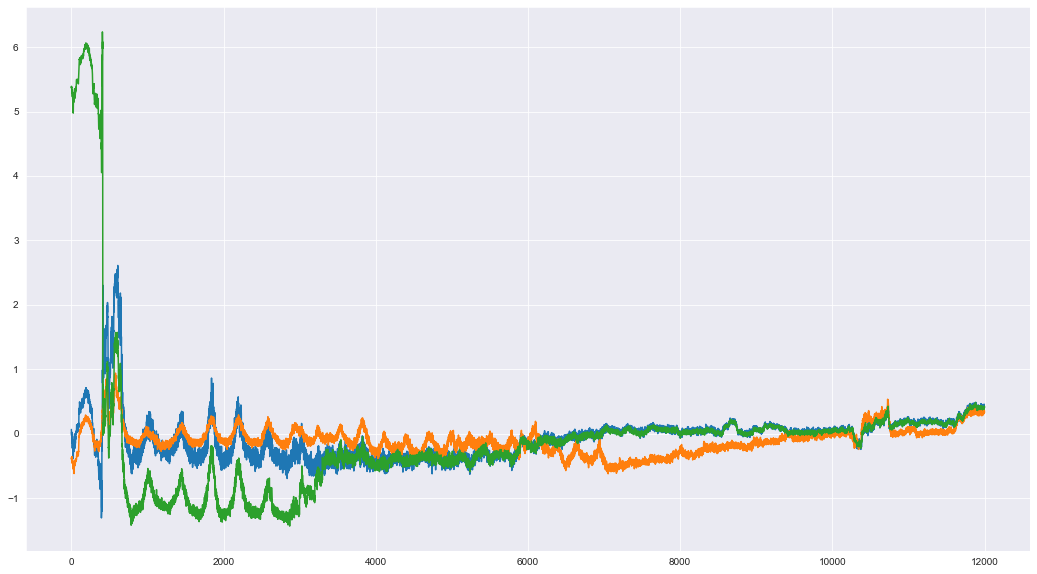

In [4]:
# subtraindo a média, 500 pacotes de janela
plt.figure(figsize=(18,10))
a = df[56].to_numpy()
b = df[2].to_numpy()
c = df[54].to_numpy()

for n in [a,b,c]:
    aux = n[:3000] - n[:3000].mean()
    means = [n[:3000].mean()]
    for idx in range(3000, len(n), 100):
        mean = np.mean(n[idx-2900:idx+100])
        window_mean = n[idx:idx+100] - mean
        aux = np.concatenate([aux, window_mean])
        means.append(mean)
    plt.plot(aux)
    means = np.array(means)
    print("Média das médias das janelas:", np.mean(means), "\nDesvio padrão das médias das janelas:", means.std(), "\nMínimo das médias das janelas:", means.min(), "\nMáximo das médias das janelas:", means.max())
    print("\n")


> Ficou o melhor resultado até agora. Devemos passar o filtro hampel também para remoção de outliers.

In [5]:
from hampel_filter import hampel_jit

In [13]:
hampel_jit(c[:3000] - c[:3000].mean(), 1000)

array([ 5.38120904,  5.38120904,  5.38120904, ..., -0.96162377,
       -0.96162377, -0.96162377])

Média das médias das janelas: -0.2074087156837395 
Desvio padrão das médias das janelas: 0.26291878001550134 
Mínimo das médias das janelas: -0.44229050503309025 
Máximo das médias das janelas: 0.5125506614539029


Média das médias das janelas: -0.11581080351434224 
Desvio padrão das médias das janelas: 0.36855503244666094 
Mínimo das médias das janelas: -0.5854456936312105 
Máximo das médias das janelas: 0.42124648041628676


Média das médias das janelas: -6.463375903527733 
Desvio padrão das médias das janelas: 0.35344626866833095 
Mínimo das médias das janelas: -6.7271138569565565 
Máximo das médias das janelas: -4.8933868556314275




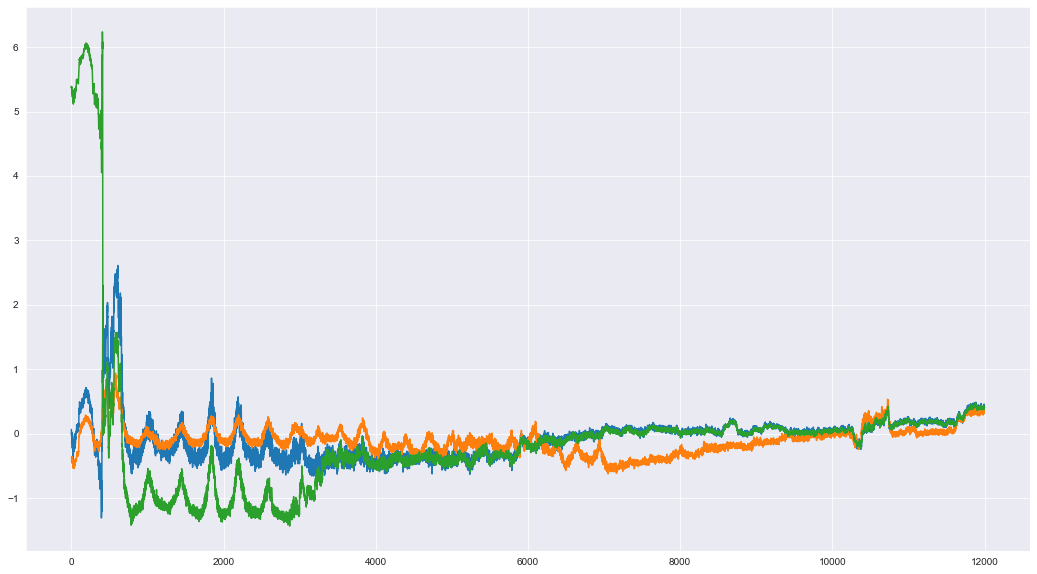

In [15]:
# subtraindo a média, 500 pacotes de janela
plt.figure(figsize=(18,10))
a = df[56].to_numpy()
b = df[2].to_numpy()
c = df[54].to_numpy()

for n in [a,b,c]:
    aux = hampel_jit(n[:3000] - n[:3000].mean(), 100)
    means = [n[:3000].mean()]
    for idx in range(3000, len(n), 100):
        mean = np.mean(n[idx-2900:idx+100])
        window_mean = n[idx:idx+100] - mean
        window_mean = hampel_jit(window_mean, 10)
        aux = np.concatenate([aux, window_mean])
        means.append(mean)
    plt.plot(aux)
    means = np.array(means)
    print("Média das médias das janelas:", np.mean(means), "\nDesvio padrão das médias das janelas:", means.std(), "\nMínimo das médias das janelas:", means.min(), "\nMáximo das médias das janelas:", means.max())
    print("\n")


# Plotando espectogramas

In [16]:
import seaborn as sns

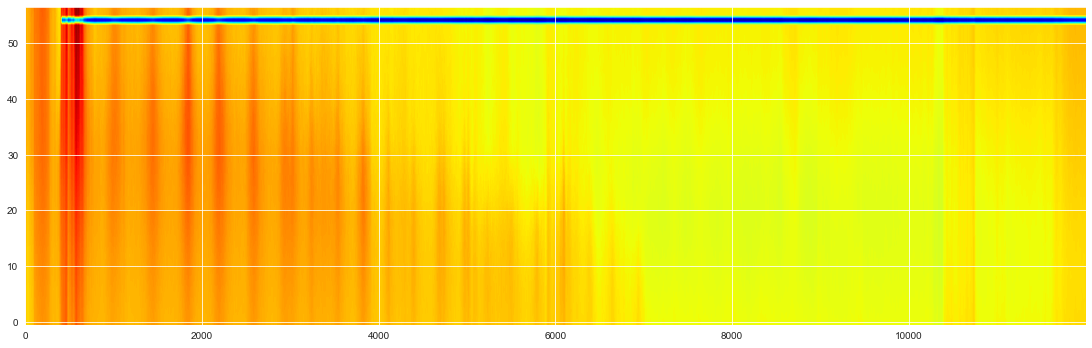

In [51]:
fig, ax = plt.subplots(figsize=(19,10))
ax.imshow(phase_diff_unwraped.T, cmap=plt.cm.jet, origin='lower')

# setando a proporcao do eixo x e y
ratio = 0.30
x_left, x_right = ax.get_xlim()
y_low, y_high = ax.get_ylim()
ax.set_aspect(abs((x_right-x_left)/(y_low-y_high))*ratio)

plt.show()

<AxesSubplot:>

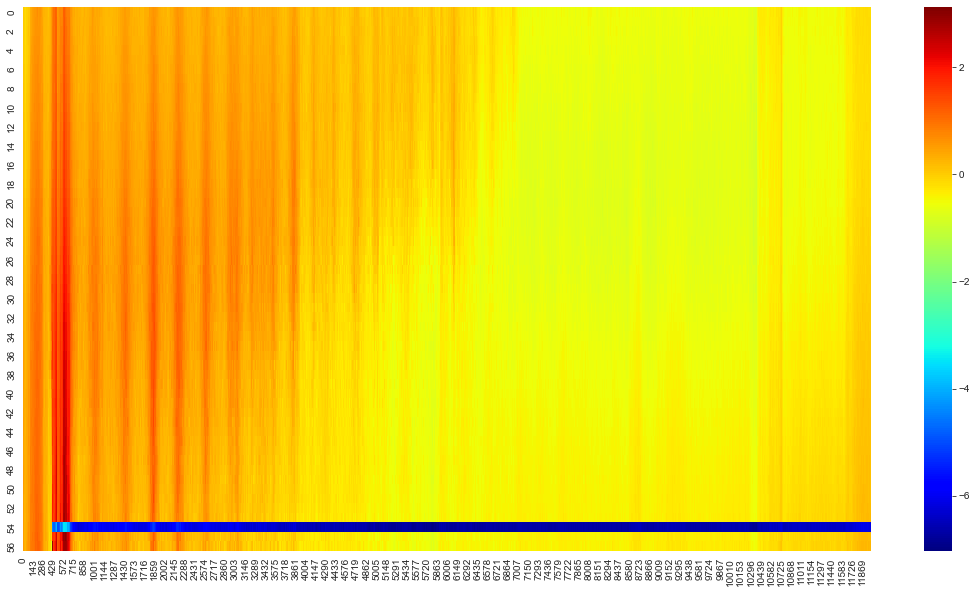

In [62]:
plt.figure(figsize=(19,10))
sns.heatmap(phase_diff_unwraped.T, cmap=plt.cm.jet)

In [22]:
phase_diff_unwraped.shape

(12000, 57)

In [24]:
new_df = pd.DataFrame(dtype=np.float32)
for n in phase_diff_unwraped.columns:
    aux = hampel_jit(phase_diff_unwraped[n][:3000] - phase_diff_unwraped[n][:3000].mean(), 100)
    for idx in range(3000, len(phase_diff_unwraped[n]), 100):
        mean = np.mean(phase_diff_unwraped[n][idx-2900:idx+100])
        window_mean = phase_diff_unwraped[n][idx:idx+100] - mean
        window_mean = hampel_jit(window_mean, 10)
        aux = np.concatenate([aux, window_mean])

    new_df[n] = aux.astype(dtype=np.float32)

In [26]:
new_df.T.shape

(57, 12000)

<AxesSubplot:>

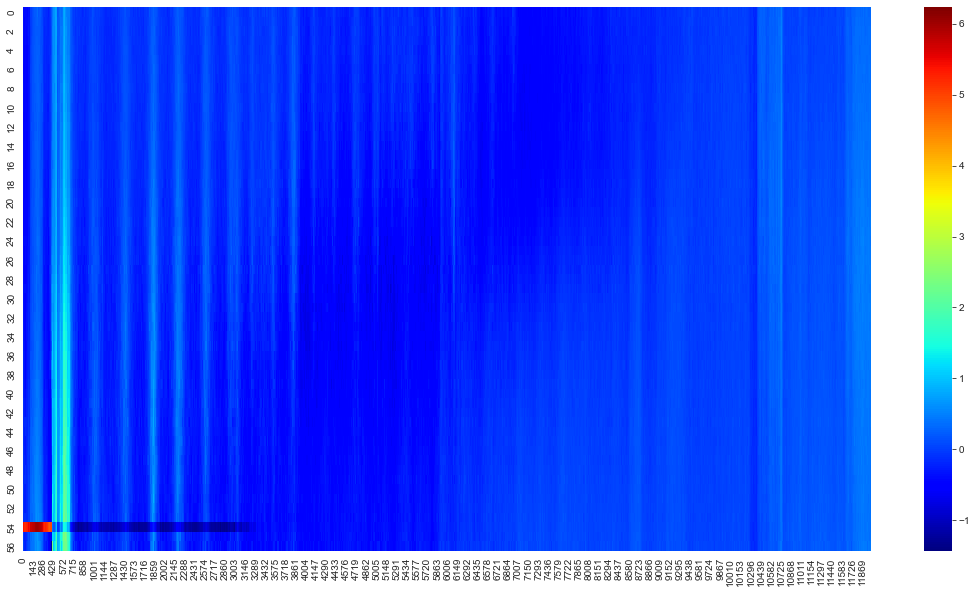

In [27]:
plt.figure(figsize=(19,10))
sns.heatmap(new_df.T, cmap=plt.cm.jet)

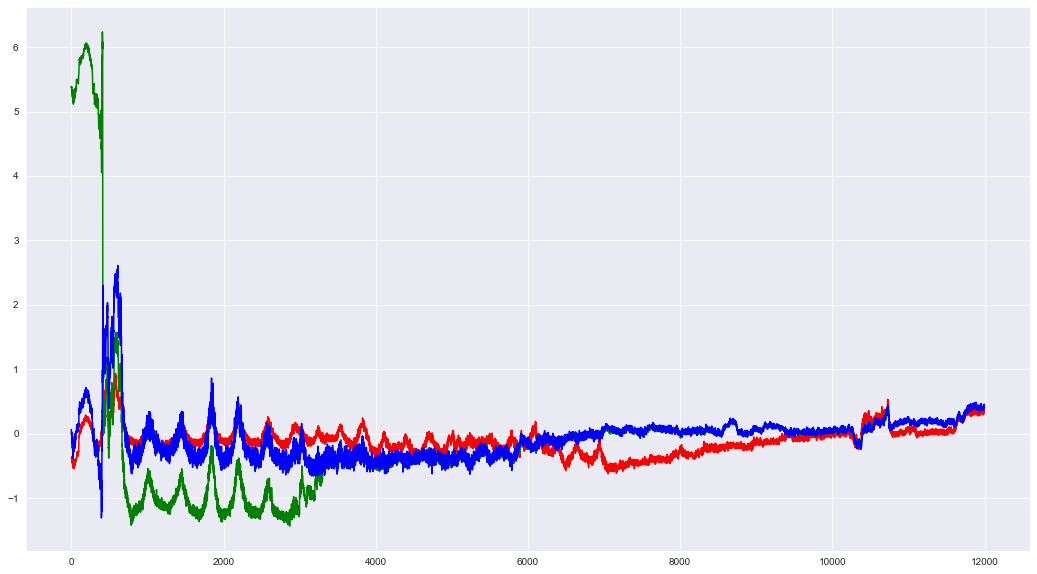

In [66]:
plt.figure(figsize=(18,10))
plt.plot(new_df[2], color="r")
plt.plot(new_df[54], color="g")
plt.plot(new_df[56], color="b")

> Ficou bom, mas e se ao invés de fazer por coluna, fazer o hampel por linha?

In [53]:
new_df2 = pd.DataFrame(columns=range(phase_diff_unwraped.shape[1]), dtype=np.float32)
for line in range(phase_diff_unwraped.shape[0]):
    window_mean = hampel_jit(phase_diff_unwraped.loc[line], 10)
    new_df2 = pd.concat([new_df2, pd.DataFrame(window_mean.reshape(1,-1))])


In [61]:
new_df2.reset_index(drop=True, inplace=True)

<AxesSubplot:>

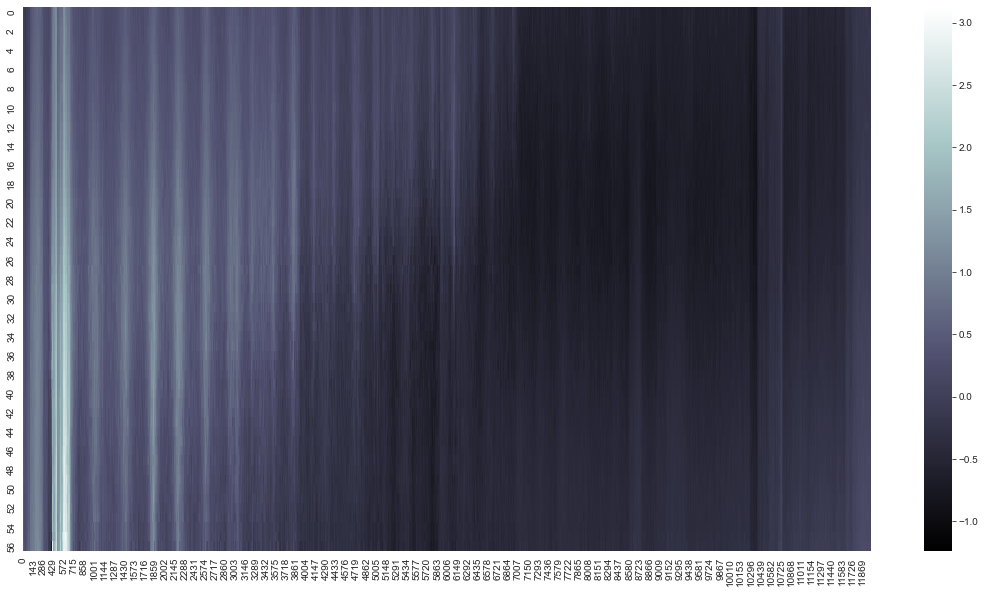

In [72]:
plt.figure(figsize=(19,10))
sns.heatmap(new_df2.T, cmap="bone")

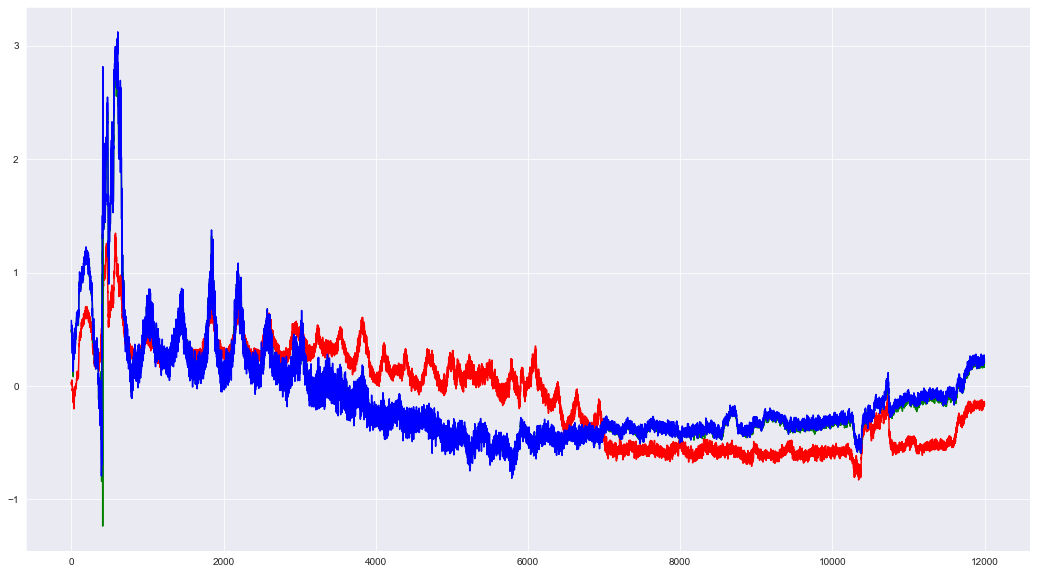

In [65]:
plt.figure(figsize=(18,10))
plt.plot(new_df2[2], color="r")
plt.plot(new_df2[54], color="g")
plt.plot(new_df2[56], color="b")